# Overplotting

Overplotting occurs when there is so much data to display in a plot that any relevant trends get covered up by the sheer number of points that are being plotted. This is a _major_ problem when creating useful visualizations because it prevents people from being able to read and draw conclusions from your plots.

In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
plt.style.use('seaborn')
np.random.seed(13)

def hue_plot(alpha, x, y):
    plt.scatter(x, y, alpha=alpha);
    
def slider_plot(x, y):
    interact(lambda alpha: hue_plot(alpha, x, y), alpha=widgets.FloatSlider(min=0, max=1, step=0.1, value=1))

## Quantitative vs. Quantitative Variables

When you are plotting two quantitative variables against each other, overplotting can occur when there are simply too many data points or when the points come from a distribution with highly localized probabilities (e.g. the normal distribution). For example, take this fake data set below:

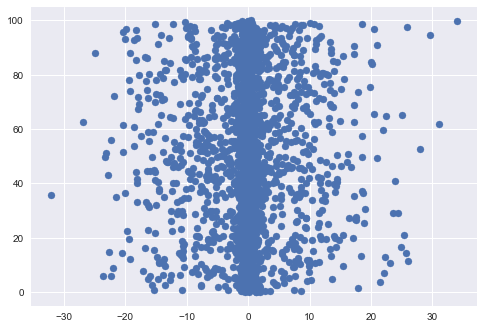

In [2]:
x_quant = np.random.normal(0, 10, 1000)
x_quant = np.append(x_quant, np.random.normal(0, 1, 1000))
y_quant = np.random.uniform(0, 100, 2000)

plt.scatter(x_quant, y_quant);

As you can see, this plot suffers from major overplotting in the center, although not so much on the sides. How can we combat this?

### The `alpha` Parameter

The `alpha` argument of `plt.scatter()` (which comes from the "alpha" in RGBA) sets the opacity of the points. By lowering the opacity we can make the density of points more clear, as areas which contain more points will be more opaque than areas with fewer points. The call to `plt.scatter()` that takes into account the `alpha` parameter would look like this:

```python
plt.scatter(x, y, alpha=0.2) # fill in 0.2 with your alpha value
```

The widget below shows the plot for different values of `alpha`.

In [3]:
slider_plot(x_quant, y_quant)

interactive(children=(FloatSlider(value=1.0, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

## Categorical vs. Quantitative Variables

Sometimes, you will need to plot a categorical value against a quantitative variable. In this example we consider a binary (`0` or `1`) random variable, but the technique we show can easily be applied to a variable with more than 2 possible values.

Consider the data set generated below.

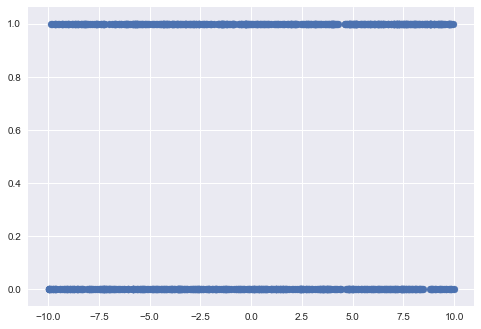

In [4]:
x_cat = np.random.uniform(-10, 10, 1000)
y_cat = np.random.choice([0, 1], 1000)

plt.scatter(x_cat, y_cat);

It clearly suffers from overplotting because you can't compare the distributions of points with value `0` against those with value `1`. Let's try applying our hue change again:

In [5]:
slider_plot(x_cat, y_cat)

interactive(children=(FloatSlider(value=1.0, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

This is _ok_, but it is still really unclear what exactly is going on in there.

### Jittering

The best way to combat categorical overplotting is to **jitter** the data. In jittering, a bit of noise is added along the categorical axis. While it may seem like jittering prevents you from drawing statistical conclusions, we are only using it to display the data, not to do any calculations on. The trick to effective jittering is to add enough noise so that the data are separated from like values but not so much that you can't separate the categories from one another.

Below, we add uniform noise to the data above and see the result of $y$-jittering:

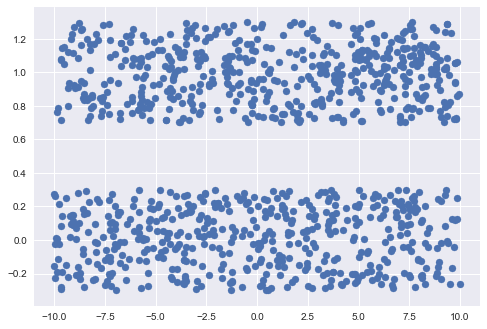

In [6]:
y_jitter = np.random.uniform(-.3, .3, 1000)
noisy_y_cat = y_cat + y_jitter

plt.scatter(x_cat, noisy_y_cat);

As you can see, jittering separated the points really well. But what if we had a data set where the data is non-uniform on _both_ axes? Consider the data below:

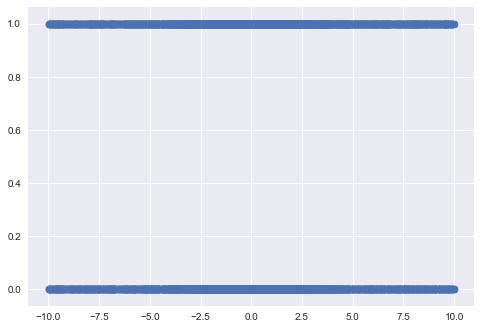

In [7]:
big_x_cat = np.append(np.random.uniform(-10, 10, 5000), np.random.normal(0, 2, 5000))
big_y_cat = np.random.choice([0, 1], 10000)

plt.scatter(big_x_cat, big_y_cat);

You can clearly see that the $y$ axis is categorical, but we can't make any conclusions about the $x$ axis. Let's add some jittering to our data:

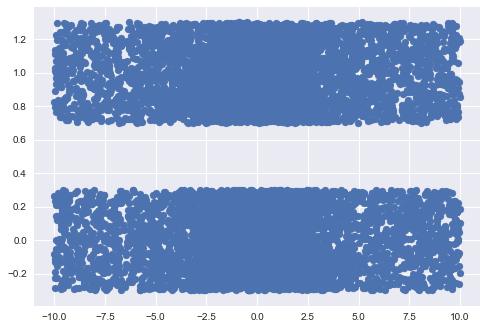

In [8]:
big_y_jittered = big_y_cat + np.random.uniform(-.3, .3, 10000)

plt.scatter(big_x_cat, big_y_jittered);

We can see that maybe there's a bit higher density centered around $x=0$ but, beyond that, we can't really draw any conclusions. So, in this scenario, we can use jittering in conjunction with the hue to see if we can spot some patterns in $x$'s distribution.

In [9]:
slider_plot(big_x_cat, big_y_jittered)

interactive(children=(FloatSlider(value=1.0, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

By decreasing `alpha` we see that the distribution of $x$ is centered around 0, and that it is loosely bell-shaped. This is to be expected, as half of the $x$ data points are drawn from a normal (0, 2) distribution.

Keep this methods in mind when you are making plots, and always make sure that you're not overplotting. The best way to combat overplotting is to find ways to represent the most data without relying on 2 axes. This can, for example, be done by varying the size of the point or using `alpha` to represent some kind of ordinal scale. The effective data scientist uses the techniques you learned in todays lecture in conjunction with these two methods to create informative, understandable plots.